# <span style="color:green"> ESERCITAZIONE 11 </span>

### <span style="color:blue">  Esercizio 11.3 </span> 
<span style="color:blue"> Prova ad estendere il modello NN per fare la regressione della funzione trigonometrica in $2D$:
\begin{equation}    
    f(x,y) = \sin(x^2+y^2), \quad \quad x \in [-3/2,3/2], \quad y \in [-3/2,3/2].
\end{equation} </span>

In [1]:
#Digitare sulla riga di comando da terminale:
#module load python3/anaconda per jupyter notebook.
#source activate DeepLearning per Tensorflow e Keras.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Eseguendo le tre caselle di seguito è possibile rappresentare la funzione trigonometrica in $2D$ della quale dobbiamo fare la regressione. Prima definisco gli intervalli delle coordinate  $x$ e $y$, poi propongo il grafico prima in due e dopo in tre dimensioni.

In [3]:
#Eseguire queste tre caselle se si vuole vedere un grafico della funzione in un intervallo ampio.
def sinusoide(x,y):
    return np.sin(x*x+y*y)

#Intervallo più ampio.
x = np.linspace(-3,3,600) #Genera i valori di x.
y = np.linspace(-3,3,600) #Genera i valori di y.

x, y = np.meshgrid(x, y) #Crea una griglia di valori x, y. 
z = sinusoide(x,y) #Funzione da disegnare.

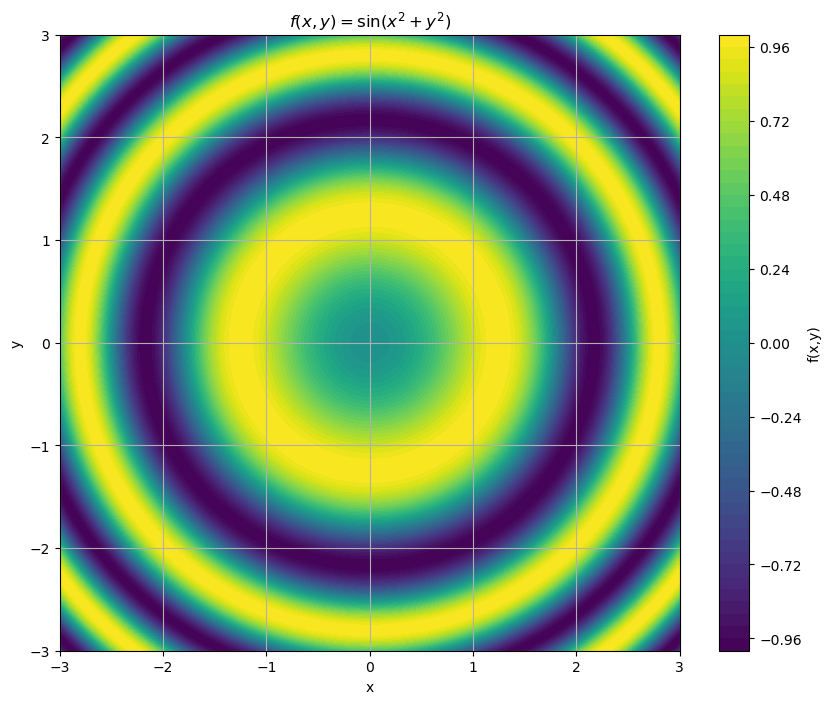

In [4]:
#Grafico in due dimensioni.
plt.figure(figsize=(10,8))
plt.contourf(x, y, z, levels=60, cmap='viridis') #Crea un grafico a contorni.
plt.colorbar(label='f(x,y)') #Aggiungi una barra dei colori.

plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x,y)=\sin (x^2+y^2)$')

plt.grid(True)
plt.show()

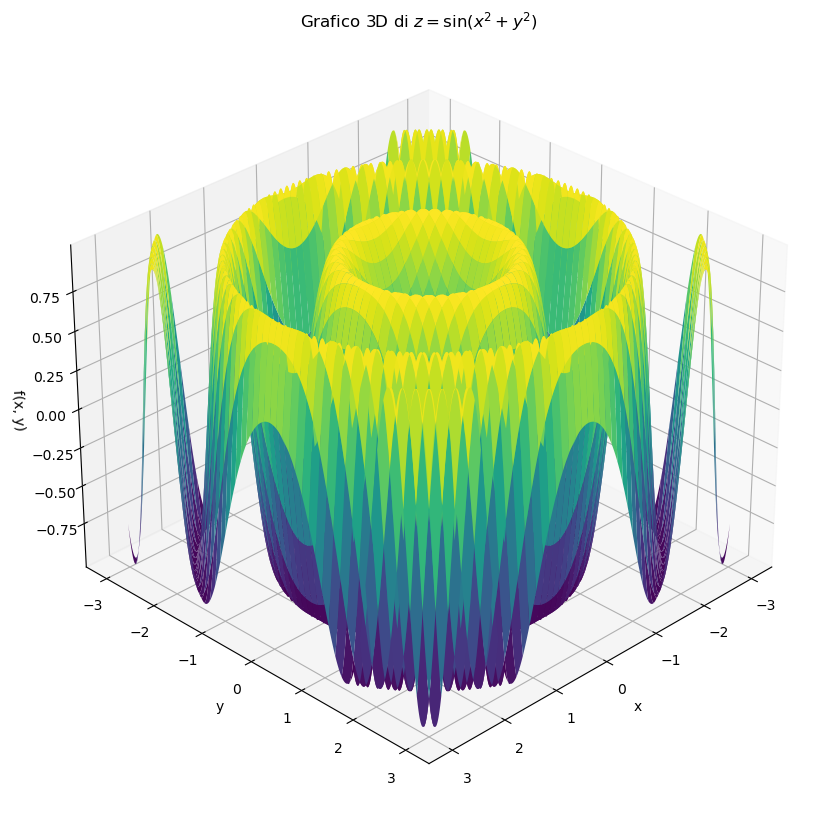

In [5]:
#Grafico in tre dimensioni.
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
#ax.plot_wireframe(x, y, z) #Se al posto dei colori preferisci la rete.
#ax.view_init(elev=0, azim=90) #Da questa prospettiva si vede il minimo in (0,0,0).

ax.view_init(elev=30, azim=45)  #Imposta l'elevazione e l'azimuth desiderati
#elev (elevazione): specifica l’angolo verticale di visualizzazione (0° guarda dall’alto, 90° guarda frontalmente).
#azim (azimuth): specifica l’angolo orizzontale di visualizzazione (0° guarda da sinistra, 180° guarda da destra).

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Grafico 3D di $z = \sin (x^2 + y^2)$')

plt.show()

### Regressione della funzione

In [6]:
#ASSEGNAZIONI ESERCIZIO 11.3.

#Limite dell'intervallo in cui estrarre x e y.
lim = 1.5

#Noise standard deviation = rumore sui dati iniziali.
sigma = 0.1 

#Numero di dati di training e di test. Li raddoppio perché sono in 2D.
n_train = 20000 
n_test = 2000 

#Numero di epoche e di elementi del gruppetto in cui suddivido i dati.
n_epochs = 120 
n_batch = 32

In [7]:
print('limite =', lim)
print('sigma =', sigma)
print('numero di dati di training =', n_train)
print('numero di dati di test =', n_test)
print('numero di dati nel batch =', n_batch)
print('numero di epoche =', n_epochs)

limite = 1.5
sigma = 0.1
numero di dati di training = 20000
numero di dati di test = 2000
numero di dati nel batch = 32
numero di epoche = 120


In [8]:
def sinusoide(x,y):
    return np.sin(x*x+y*y)

In [9]:
np.random.seed(0) #Genero dati tra -1.5 e 1.5 per x e y, Gaussiana per z.

### La legge

In [10]:
#Genero i dati della LEGGE.
#Disegno la funzione usando 2000 coordinate x-y-z.
x_target = np.random.uniform(-lim, lim, n_test) 
y_target = np.random.uniform(-lim, lim, n_test) 

#Li metto in ordine per visualizzarli meglio.
x_target.sort() 
y_target.sort() 

#Target: funzione sinusoide ideale. Non conosco la legge! 
#Funzione da disegnare. Come coordinate z uso la legge che dovrò trovare facendo il fit. 
z_target = sinusoide(x_target, y_target) 

print(len(z_target))
print(z_target.shape)

2000
(2000,)


In [11]:
#Punti nel formato specifico per fare i grafici: X-Y-Z.
#Fare i grafici con altri vettori a cui si assegna questo formato particolare
#e fare la regressione con i vettori originali, altrimenti se si danno in pasto
#i vettori del grafico alla rete neurale, non li accetta per fare la regressione!

X, Y = np.meshgrid(x_target, y_target) #Crea una griglia di valori per x e y. 
Z = sinusoide(X,Y) 

print(len(Z))
print(Z.shape)

2000
(2000, 2000)


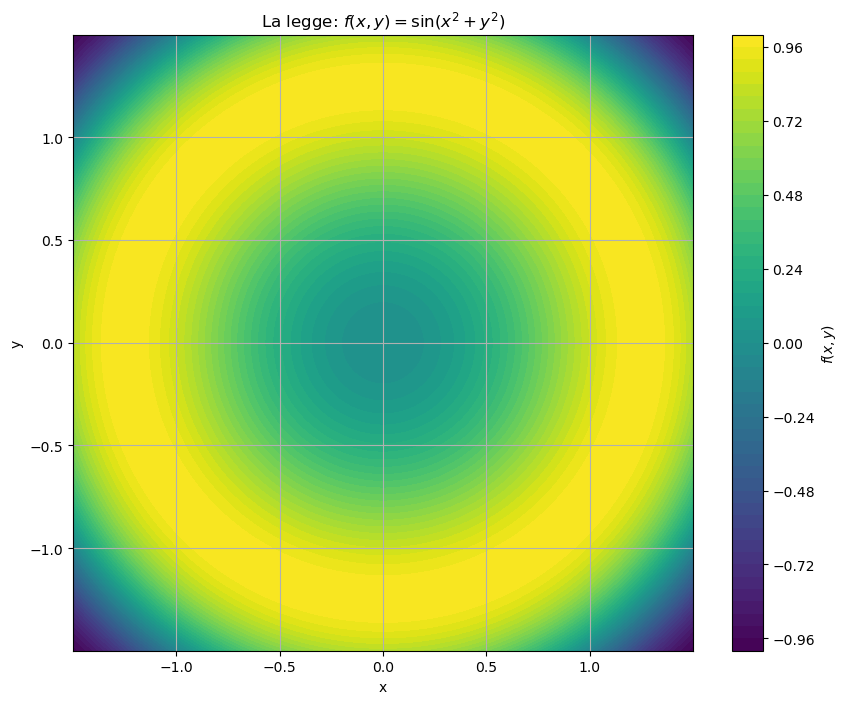

In [12]:
#Faccio il grafico della LEGGE in due dimensioni, con cui farò la regressione.
plt.figure(figsize=(10,8))

#Grafico in 2D: X e Y sono i punti, Z determina il colore.
plt.contourf(X, Y, Z, levels=60, cmap='viridis') #Crea un grafico a contorni.
plt.colorbar(label='$f(x,y)$') #Aggiungi una barra dei colori.

plt.xlabel('x')
plt.ylabel('y')
plt.title('La legge: $f(x,y)=\sin (x^2+y^2)$')

plt.grid(True)
plt.show()

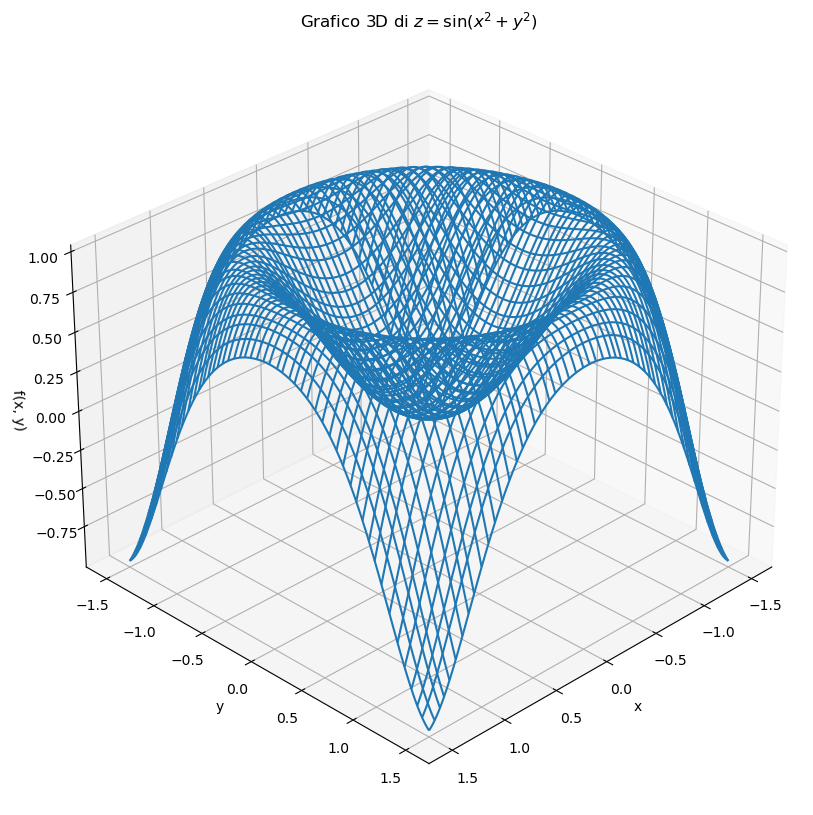

In [13]:
#Faccio il grafico della LEGGE in tre dimensioni, con i punti nel formato desiderato.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_wireframe(X, Y, Z)

ax.view_init(elev=30, azim=45)  #Imposta l'elevazione e l'azimuth desiderati
#ax.view_init(elev=0, azim=90) #Da questa prospettiva si vede il minimo in (0,0,0).
#elev (elevazione): specifica l’angolo verticale di visualizzazione (0° guarda dall’alto, 90° guarda frontalmente).
#azim (azimuth): specifica l’angolo orizzontale di visualizzazione (0° guarda da sinistra, 180° guarda da destra).

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Grafico 3D di $z = \sin (x^2 + y^2)$')

plt.show()

### Dati di test

In [14]:
#Genero i dati di TEST.
#Dati di test per le coordinate x e y.
x_valid = x_target
y_valid = y_target

#Dati di test per le coordinate z.
z_valid = np.random.normal(sinusoide(x_valid, y_valid), sigma)
print(len(z_valid))

#Metto insieme le coppie x-y generate: una matrice 2x2000.
#2 colonne = coordinate x-y; 2000 righe = punti selezionati per fare il test.
#Con questi punti di coordinate x-y-z testeremo la rete neurale.

#column_stack e row_stack: funzione di Numpy che sovrappone i vettori per farne una matrice.
#row = li sovrappone come righe, column = li sovrappone come colonne.  
xy_valid = np.column_stack((x_valid, y_valid))

#Verifico che i dati siano nella forma giusta.
print(z_valid.shape)
print(xy_valid.shape)

2000
(2000,)
(2000, 2)


In [15]:
#Dati nel formato per fare il grafico. Per zz è funzione di xx e yy!
xx, yy = np.meshgrid(x_valid, y_valid) #Crea una griglia di valori per x e y. 
zz = np.random.normal(sinusoide(xx, yy), sigma)

print(xx.shape)
print(zz.shape)

(2000, 2000)
(2000, 2000)


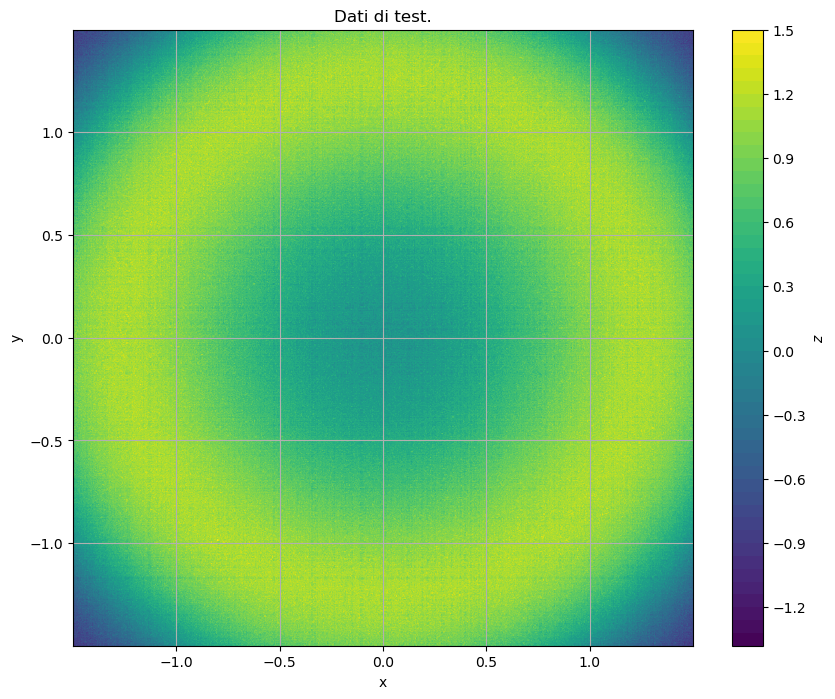

In [16]:
#Faccio il grafico dei dati di TEST.
plt.figure(figsize=(10,8))

#Grafico in 2D: xx e yy sono i punti, zz determina il colore.
plt.contourf(xx, yy, zz, levels=50, cmap='viridis') #Crea un grafico a contorni.
plt.colorbar(label='$z$') #Aggiungi una barra dei colori.

plt.title('Dati di test.')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.show()

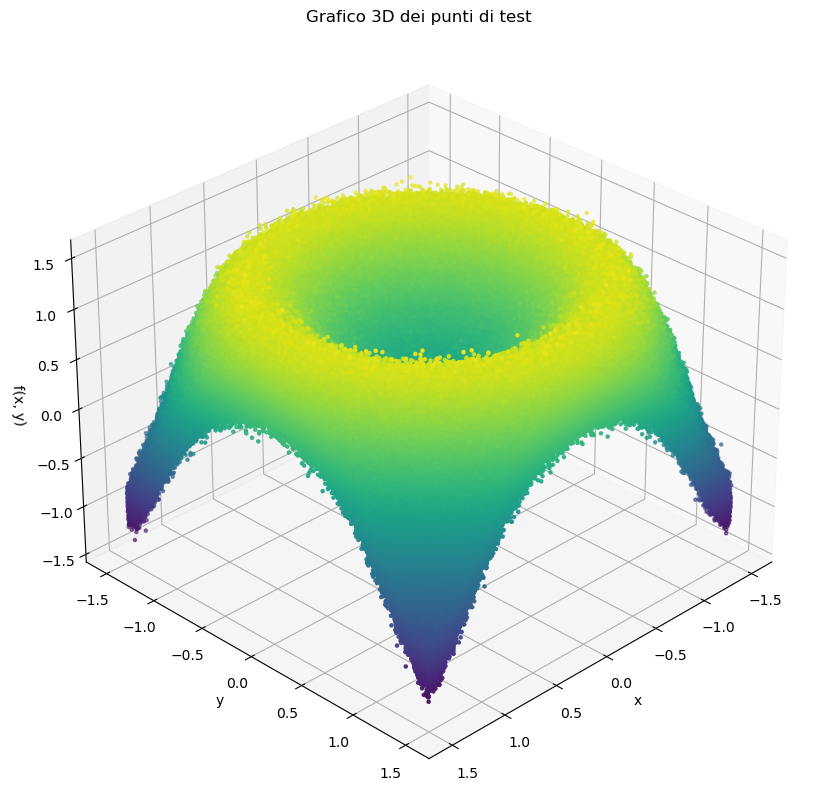

In [17]:
#Faccio il grafico dei dati di test in tre dimensioni, con i punti nel formato desiderato.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xx, yy, zz, c=zz, marker='.', cmap='viridis')

ax.view_init(elev=30, azim=45)  #Imposta l'elevazione e l'azimuth desiderati
#ax.view_init(elev=0, azim=90) #Da questa prospettiva si vede il minimo in (0,0,0).
#elev (elevazione): specifica l’angolo verticale di visualizzazione (0° guarda dall’alto, 90° guarda frontalmente).
#azim (azimuth): specifica l’angolo orizzontale di visualizzazione (0° guarda da sinistra, 180° guarda da destra).

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Grafico 3D dei punti di test')

plt.show()

**Osservazioni dai grafici.** Osserviamo che, rispetto al caso del grafico perfetto della legge teorica, il grafico dei dati sperimentali ha la stessa forma, ma più schiacciata e gonfia. Inoltre il minimo locale non è in $(0,0,0)$, ma in un suo intorno, stabilito dal rumore sigma sui dati. Confrontiamo i grafici in due dimensioni della legge e dei dati di test. Nel grafico della legge, il primo, i picchi e le valli della sinusoide sono ben definiti e lo stacco tra un colore e l'altro è netto, mentre nel grafico dei punti di test, il secondo, i colori sono un po' mescolati e i picchi e le valli non sono ben definiti. Questo perché i dati di test non sono estatti secondo la legge esatta, ma secondo la legge disturbata da un rumore (noise standard deviation) sigma sui dati.

### Dati di training

In [18]:
#Genero i dati di TRAINING.
#Dati di training per le coordinate x-y-z.
x_train = np.random.uniform(-lim, lim, n_train)
y_train = np.random.uniform(-lim, lim, n_train)
z_train = np.random.normal(sinusoide(x_train, y_train), sigma)
print(len(z_train))

#Con questi punti di coordinate x-y-z addestriamo la rete nerurale.
#Metto insieme le terne x-y-z generate: un vettore di due colonne.
#Scrivo i dati in questo formato in modo che vada bene alla rete neurale.
#Non farà più un fit di y=f(x) ma di z=f(x,y). Nel modello: x = xy e y = z.
xy_train = np.column_stack((x_train, y_train))

print(z_train.shape)
print(xy_train.shape)

20000
(20000,)
(20000, 2)


### Rete neurale

In [19]:
#Per trovare la funzione che faccia la regressione, costruisco un modello di rete neurale, NN.
import tensorflow as tf #Importo le librerie generiche per costruire le reti neurali.
from tensorflow import keras

#Importo le librerire specifiche per costruire il modello di rete neurale.
#Elementi: modello del layer, come interagiscono i layer, tipo della funzione di attivazione.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#Importo le librerie per stampare le caratteristiche e le prestazioni.
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2024-06-18 16:15:50.555270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
#Scelgo gli elementi sulla base dell'esercizio 11.2, quelli con cui mi sono trovata meglio.
#Siccome il numero dei parametri da fittare e' 2, (x,y), il numero in input shape iniziale deve essere 2.
#Dato che f dipende da 2 parametri ho il doppio dei dati, quindi per ciascun layer raddoppio il numero di neuroni.
#Essendo z=f(x,y), c'e' un solo valore finale di output per ogni coppia (x,y). 
#Per questo nel layer finale ci deve essere un solo neurone. 

model = tf.keras.Sequential() #Definisco il modello del layer: tanti neuroni in linea retta.
#input_shape=(2,) = il neurone lavora con due tipi di dato iniziale: x, y.
#Dense = tipo di interazione tra i neuroni: tutti interagiscono con tutti.
model.add(Dense(32, input_shape=(2,), activation='elu')) #Due input: x, y.
model.add(Dense(16, activation='elu')) 
model.add(Dense(8, activation='elu'))
model.add(Dense(4, activation='elu')) 
model.add(Dense(2, activation='elu')) 
model.add(Dense(1, activation='elu')) #Un output: z.

#Compilo il modello scegliendo ottimizzatore, funzione costo e metrica.
#sdg = stocastico gradient descent, mse = mean square error. 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2024-06-18 16:15:56.220027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 16:15:56.220576: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
#Riassunto del modello.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 809
Trainable params: 809
Non-trainable pa

In [22]:
#Regressione del modello usando training dataset: 
#numero di epoche = n_epochs, numero di dati nel gruppetto = n_batch
#Riporto il progresso dei dati di training confrontato con i dati di test.
history = model.fit(x=xy_train, y=z_train, 
          batch_size=n_batch, epochs=n_epochs,
          shuffle=True, 
          validation_data=(xy_valid, z_valid))

Epoch 1/120
625/625 [==============================] - 2s 2ms/step - loss: 0.1599 - mse: 0.1599 - val_loss: 0.3765 - val_mse: 0.3765
Epoch 2/120
625/625 [==============================] - 1s 2ms/step - loss: 0.1551 - mse: 0.1551 - val_loss: 0.3823 - val_mse: 0.3823
Epoch 3/120
625/625 [==============================] - 1s 2ms/step - loss: 0.1530 - mse: 0.1530 - val_loss: 0.3898 - val_mse: 0.3898
Epoch 4/120
625/625 [==============================] - 1s 2ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.3593 - val_mse: 0.3593
Epoch 5/120
625/625 [==============================] - 1s 2ms/step - loss: 0.1474 - mse: 0.1474 - val_loss: 0.3829 - val_mse: 0.3829
Epoch 6/120
625/625 [==============================] - 1s 2ms/step - loss: 0.1435 - mse: 0.1435 - val_loss: 0.3600 - val_mse: 0.3600
Epoch 7/120
625/625 [==============================] - 1s 2ms/step - loss: 0.1391 - mse: 0.1391 - val_loss: 0.3470 - val_mse: 0.3470
Epoch 8/120
625/625 [==============================] - 1s 2ms/step - 

In [23]:
#Valuta le performance del modello e le stampa.
score = model.evaluate(xy_valid, z_valid, batch_size=n_batch, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 [==============================] - 0s 2ms/step - loss: 0.0120 - mse: 0.0120

Test loss: 0.01198893878608942
Test accuracy: 0.01198893878608942


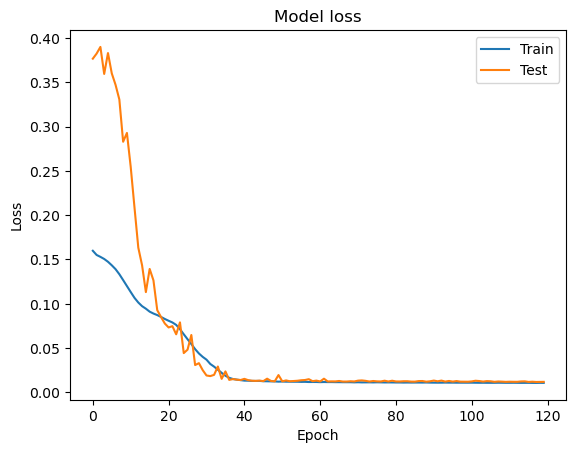

In [24]:
#Look into training history: plot training & validation loss values.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='best')
plt.show()

### Nuovi punti generati con il modello

In [25]:
#Adesso ho il modello: voglio generare dei punti usandolo.
x_predicted = np.random.uniform(-lim, lim, n_test) #Estraggo le x da una distribuzione uniforme.
y_predicted = np.random.uniform(-lim, lim, n_test) #Estraggo le y da una distribuzione uniforme.

xy_predicted = np.column_stack((x_predicted, y_predicted)) #Nel formato desiderato.
z_predicted = model.predict(xy_predicted) #Genero le z usando il modello applicato a x-y.

63/63 [==============================] - 0s 2ms/step


In [26]:
print(len(x_predicted))
print(x_predicted.shape)
print(xy_predicted.shape)
print(z_predicted.shape)

2000
(2000,)
(2000, 2)
(2000, 1)


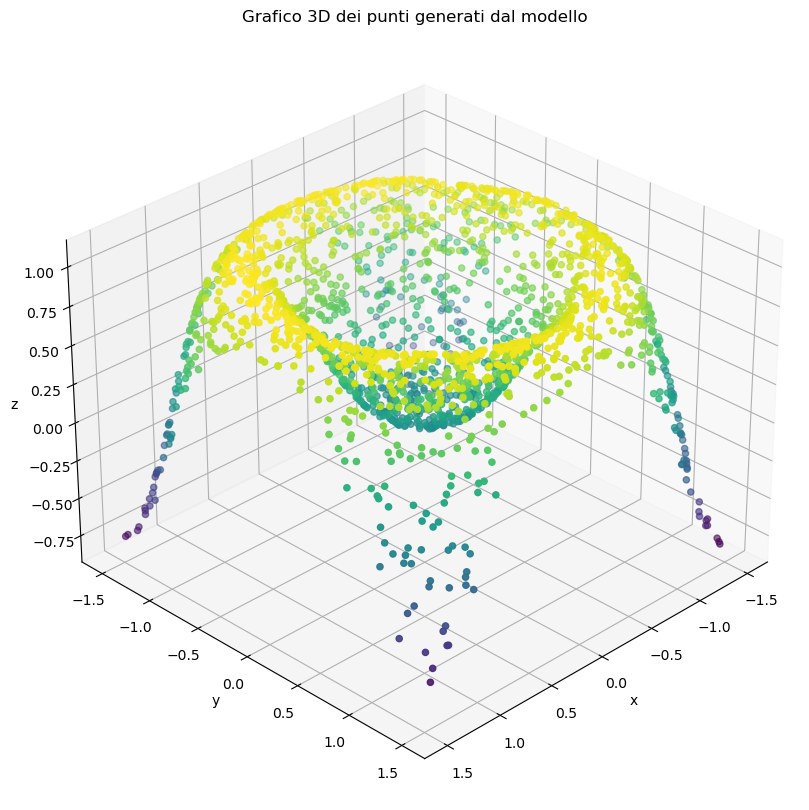

In [27]:
#Faccio il grafico dei punti predicted generati con il MODELLO.
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_predicted, y_predicted, z_predicted, c=z_predicted, marker='o', cmap='viridis')

ax.view_init(elev=30, azim=45)  #Imposta l'elevazione e l'azimuth desiderati
#ax.view_init(elev=0, azim=90) #Da questa prospettiva si vede il minimo in (0,0,0).
#elev (elevazione): specifica l’angolo verticale di visualizzazione (0° guarda dall’alto, 90° guarda frontalmente).
#azim (azimuth): specifica l’angolo orizzontale di visualizzazione (0° guarda da sinistra, 180° guarda da destra).

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Grafico 3D dei punti generati dal modello')

plt.show()

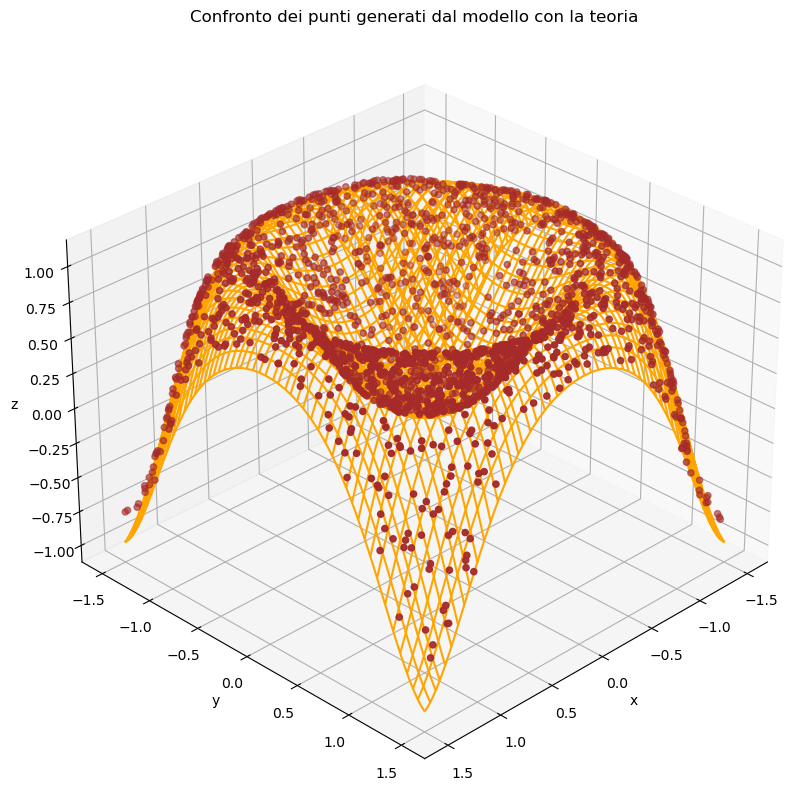

In [28]:
#Faccio il grafico dei punti predicted generati con il MODELLO confrontato con la TEORIA.
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, color='orange')
ax.scatter(x_predicted, y_predicted, z_predicted, marker='o', color='brown')

ax.view_init(elev=30, azim=45)  #Imposta l'elevazione e l'azimuth desiderati
#ax.view_init(elev=0, azim=90) #Da questa prospettiva si vede il minimo in (0,0,0).
#elev (elevazione): specifica l’angolo verticale di visualizzazione (0° guarda dall’alto, 90° guarda frontalmente).
#azim (azimuth): specifica l’angolo orizzontale di visualizzazione (0° guarda da sinistra, 180° guarda da destra).

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Confronto dei punti generati dal modello con la teoria')

plt.show()

### Conclusioni

La funzione costo si riduce a $0.012$ e i punti che sono prodotti dal modello si sovrappongono molto bene alla curva teorica. La regressione è venuta bene. 

Perché in determinate situazioni dovremmo decidere di eseguire la regressione lineare con le reti neurali anziché il fit *con carta e penna*? E' possibile eseguire il **fit solo se si conosce la legge** che genera i dati. Ad esempio, per i punti che stanno su una retta, si capisce che la legge sottesa è proprio una retta e si possono calcolare $m$ e $b$ della retta che fa il fit facendo la media di questi parametri a partire dai dati. Opto invece per la **regessione con le reti neurali se proprio non saprei dire quale sia la legge** che genera i dati. Bisogna però ricordare che, come visto nell'esercizio $11.1$, la regressione lineare ha un limite: **funziona solo nell'intervallo di punti in cui addestro la rete** e al di fuori è una retta parallela all'asse $x$. Il fit invece si può fare per tutti i punti. 